In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy.ma as ma
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from distfit import distfit
from scipy.stats import expon

<Axes: >

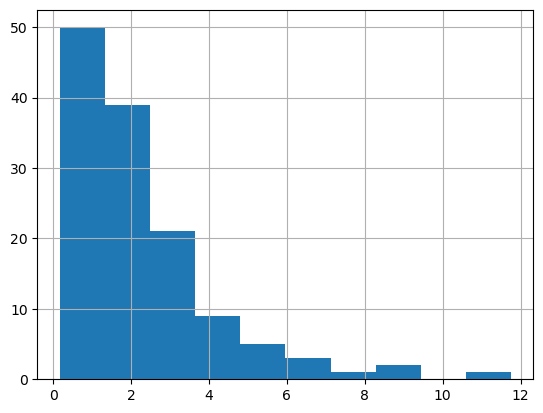

In [4]:
data_ipo=pd.read_excel(r'C:\Users\antok\OneDrive\Рабочий стол\All Materials HSE\BSc - 4 курс\Investment Portfolio Management\Проект\Data_Time_to_IPO.xlsx')
data_ipo['Years_from financing to IPO']=data_ipo['Days from financing to IPO']/365
data_ipo['Years_from financing to IPO'].hist()

<Axes: >

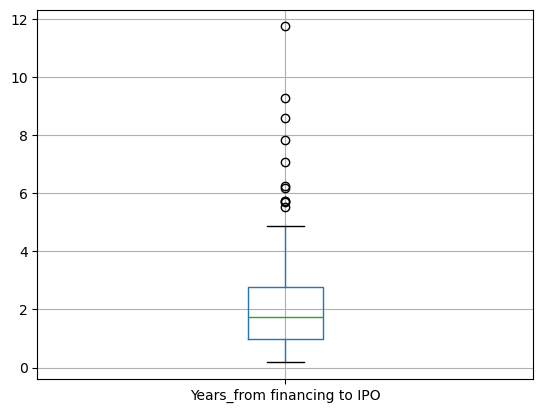

In [6]:
data_ipo[['Years_from financing to IPO']].boxplot()

In [17]:
# Initialize distfit
dist_fitter = distfit(distr=['norm', 't', 'uniform','expon','dweibull','loggamma'])
# Determine best-fitting probability distribution for data
dist_fitter.fit_transform(np.array(data_ipo['Years_from financing to IPO']))
dist_fitter.summary

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm    ] [0.00 sec] [RSS: 0.0864143] [loc=2.229 scale=1.932]
[distfit] >INFO> [t       ] [0.04 sec] [RSS: 0.0359038] [loc=1.688 scale=1.027]
[distfit] >INFO> [uniform ] [0.00 sec] [RSS: 0.231761] [loc=0.178 scale=11.574]
[distfit] >INFO> [expon   ] [0.00 sec] [RSS: 0.0204946] [loc=0.178 scale=2.051]
[distfit] >INFO> [dweibull] [0.01 sec] [RSS: 0.0469385] [loc=1.732 scale=1.273]
[distfit] >INFO> [loggamma] [0.02 sec] [RSS: 0.0871303] [loc=-706.588 scale=92.174]
[distfit] >INFO> [norm    ] [0.10 sec] [RSS: 0.0864143] [loc=2.229 scale=1.932]
[distfit] >INFO> [t       ] [0.10 sec] [RSS: 0.0359038] [loc=1.688 scale=1.027]
[distfit] >INFO> [uniform ] [0.04 sec] [RSS: 0.231761] [loc=0.178 scale=11.574]
[distfit] >INFO> [expon   ] [0.04 sec] [RSS: 0.0204946] [loc=0.178 scale=2.051]
[distfit] >INFO> [dweibull] [0.04 sec] [RSS: 0.0469385] [loc=1.732 scale=1.273]
[distfit] >INFO> [loggamma] [0.02 sec] [RSS: 0.0871303] [loc=-706.58

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,expon,0.020495,0.178082,2.05081,(),"(0.1780821917808219, 2.050810415141692)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,t,0.035904,1.688484,1.026888,"(2.2987116852321496,)","(2.2987116852321496, 1.6884837459650206, 1.026...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
2,dweibull,0.046939,1.731507,1.272722,"(0.9785927089928719,)","(0.9785927089928719, 1.731506849315069, 1.2727...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
3,norm,0.086414,2.228893,1.931921,(),"(2.2288926069225137, 1.93192077080534)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
4,loggamma,0.08713,-706.587956,92.174355,"(2186.180182132658,)","(2186.180182132658, -706.5879563563672, 92.174...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
5,uniform,0.231761,0.178082,11.573973,(),"(0.1780821917808219, 11.573972602739726)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Expon(loc:0.178082, scale:2.050810)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nexpon(loc=0.178082, scale=2.05081)'}, xlabel='Values', ylabel='Frequency'>)

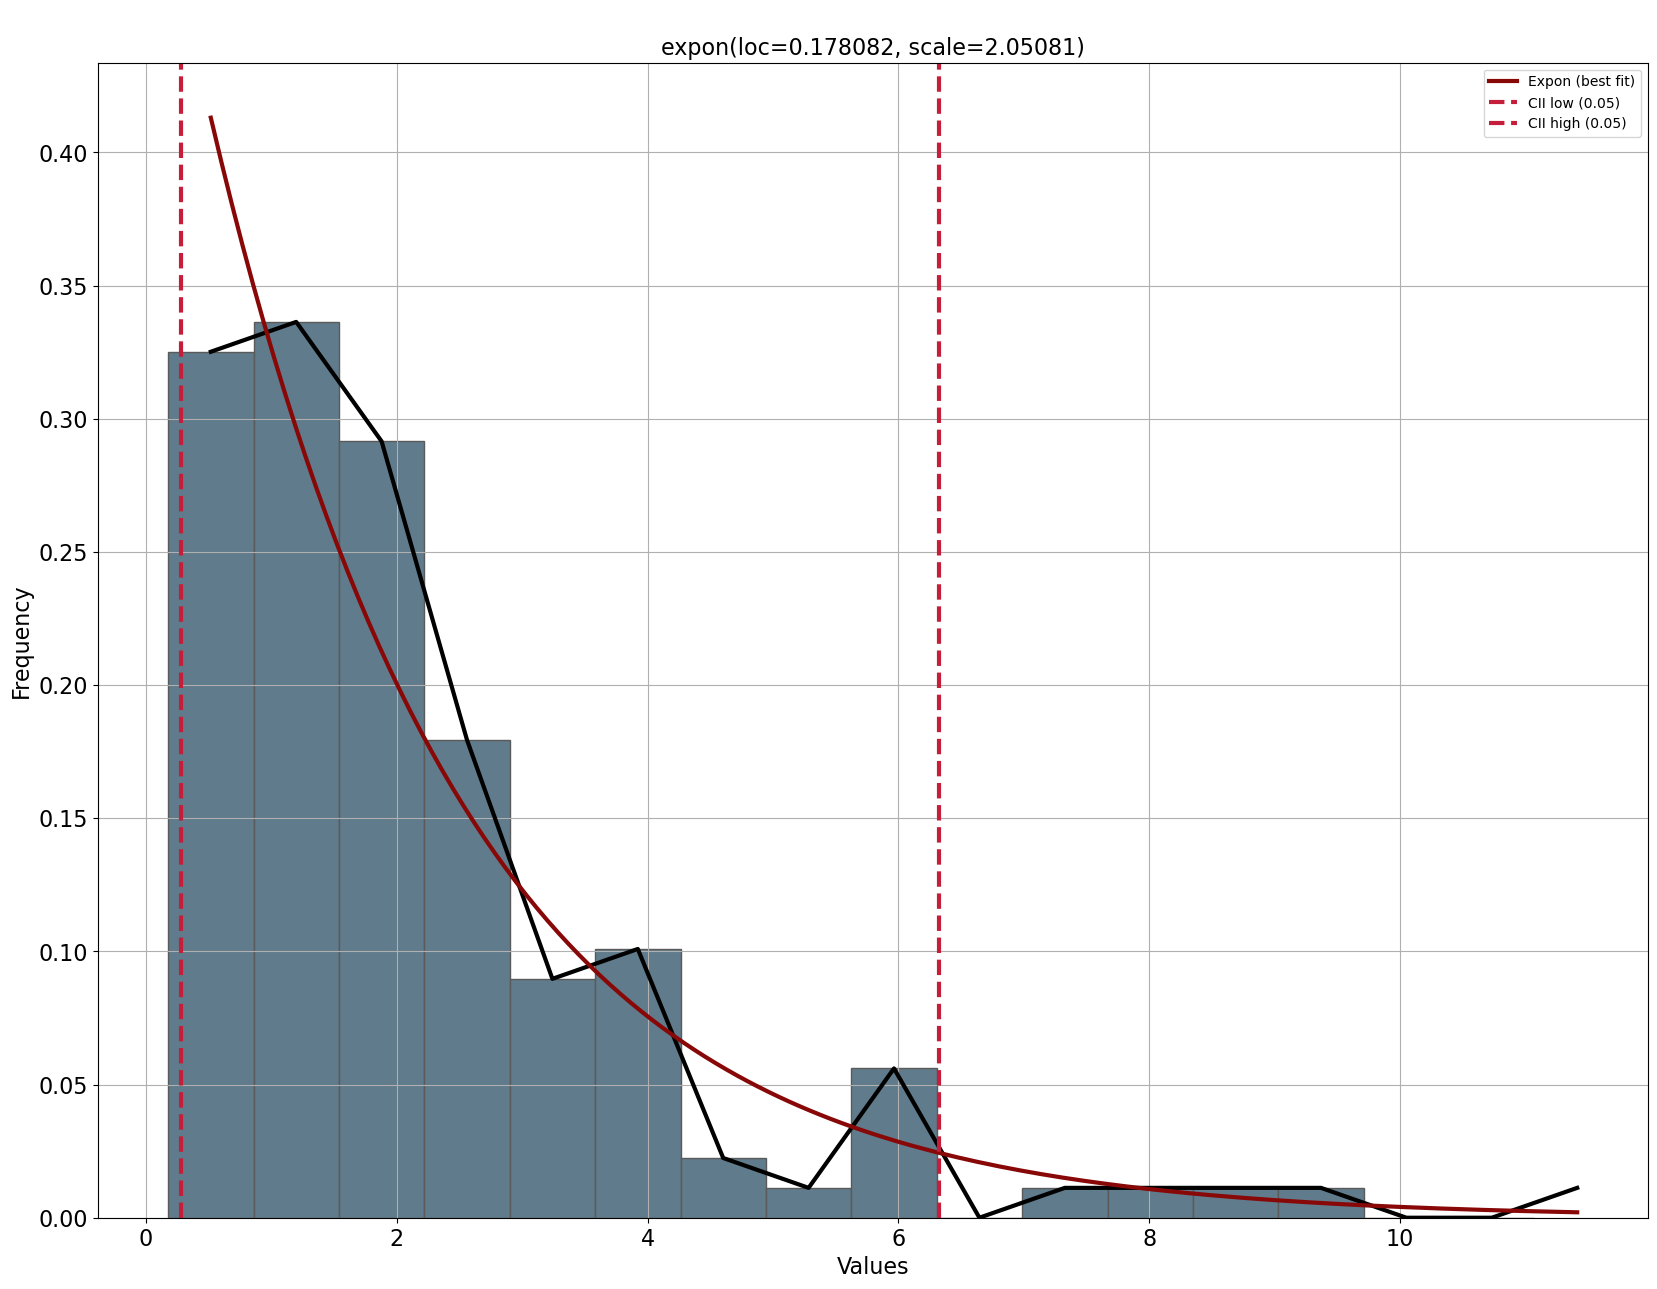

In [18]:
dist_fitter.plot()

[distfit] >INFO> Ploting CDF


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nexpon(loc=0.178082, scale=2.05081)'}, xlabel='Values', ylabel='Frequency'>)

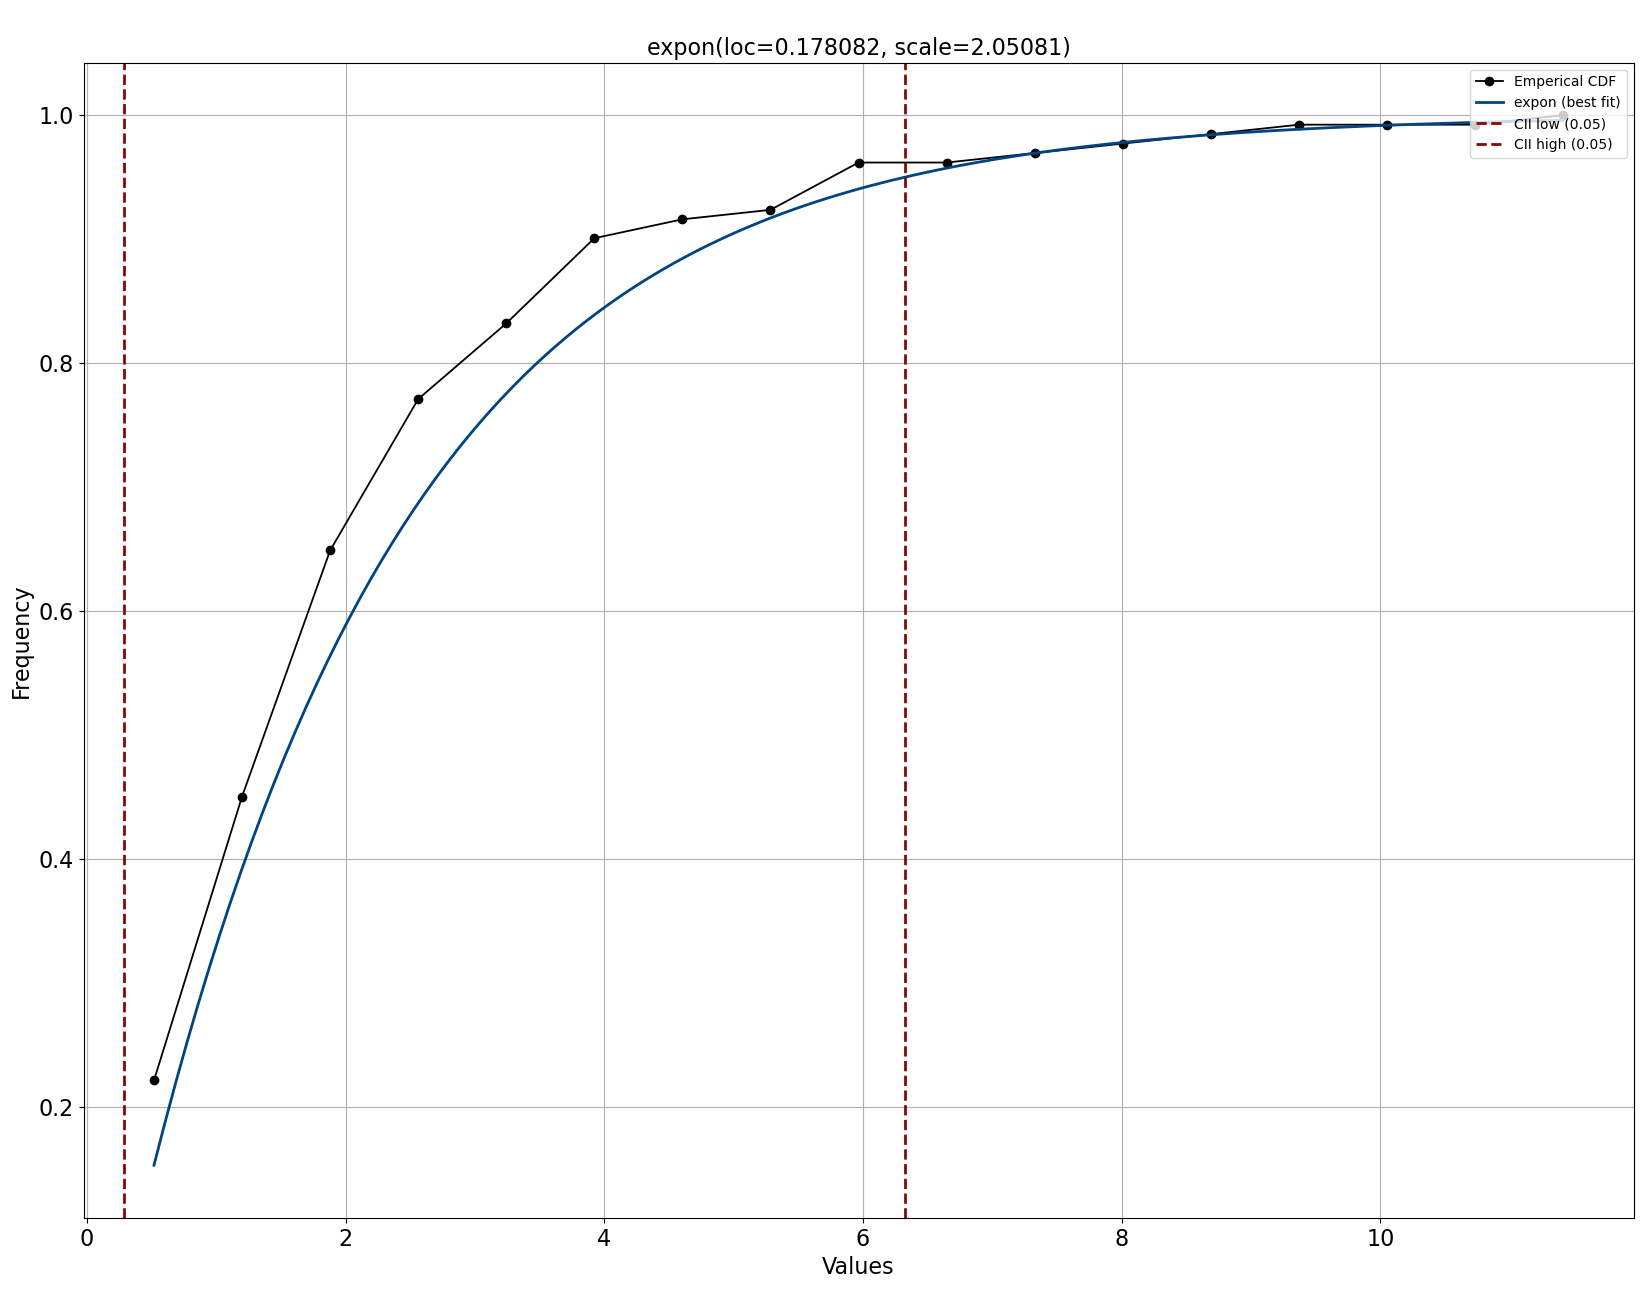

In [19]:
dist_fitter.plot_cdf()

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Expon (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

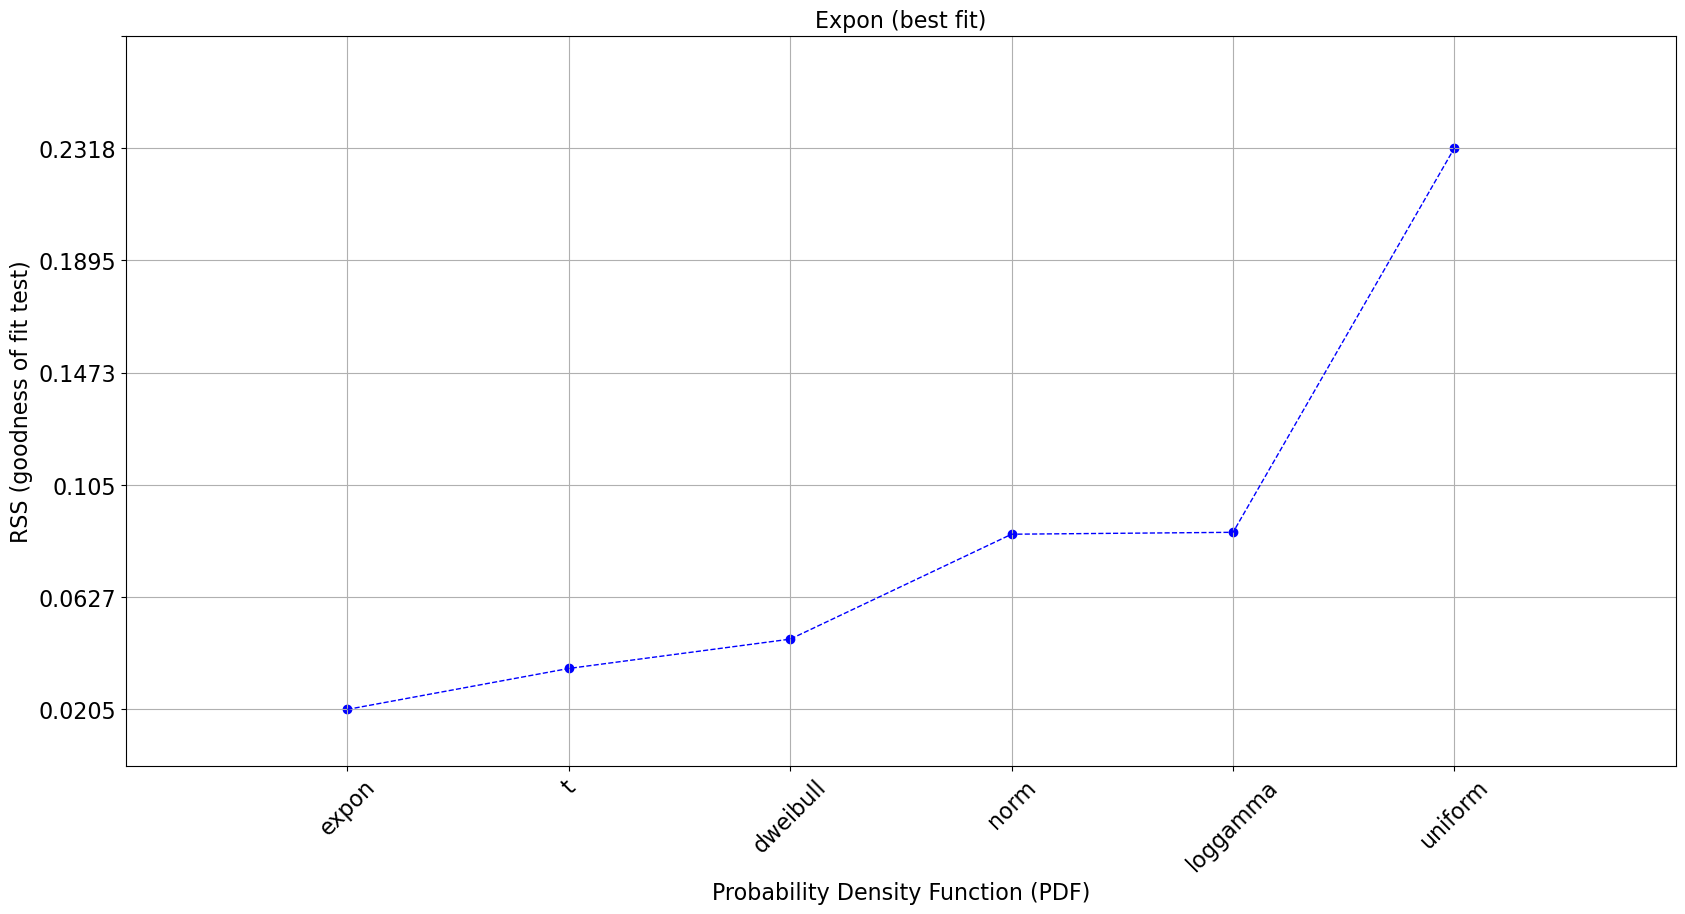

In [20]:
dist_fitter.plot_summary()

In [40]:
loc_=dist_fitter.summary['loc'][0]
print(f'Lambda of Exponential distribution is: {round(dist_fitter.summary.scale[0],3)}')
print(f'Location of Exponential distribution is: {round(loc_,3)}')

Lambda of Exponential distribution is: 2.051
Location of Exponential distribution is: 0.178
